In [1]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# My Tools
from toolkit.tools import (
    print_column_uniques,
    make_df,
    get_column_uniques,
    explode_pie,
    percentage_to_normal,
    get_color,
    replace_column_content
)

# replace_column_content(df,'column',dict)


%matplotlib inline

In [2]:
# Reseting figure size params.
plt.rcParams["figure.figsize"] = [12, 7]

In [3]:
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [4]:
# Creating the dataset.
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [5]:
df.shape

(342, 25)

# Education

    - About the "education level" of the people who answered the survey.

## General Education
    - column name : 'educacion'

In [6]:
ed_levels = get_column_uniques(df, "educacion")
ed_levels

['Ed. Basica',
 'Doctorado',
 'Ed. Secundaria',
 'Autodidacta',
 'Ed. Universitaria',
 'Master']

In [7]:
# Replacing education column content.

ed_repl = {
    'Ed. Basica': 'Basic Education',
    'Ed. Universitaria':'University Education',
    'Autodidacta':'Autodidact',
    'Doctorado':'Doctorate',
    'Ed. Secundaria':'Middle School'
}


replace_column_content(df,'educacion',ed_repl)

In [8]:
df['educacion'].value_counts().keys()

Index(['University Education',
       'Basic Education;Middle School;University Education',
       'Basic Education;Middle School;University Education;Autodidact',
       'University Education;Autodidact', 'Master', 'Middle School',
       'Basic Education;Middle School',
       'Basic Education;Middle School;Autodidact',
       'University Education;Master', 'Middle School;Autodidact',
       'Basic Education;Middle School;University Education;Master',
       'University Education;Master;Autodidact', 'Autodidact',
       'Basic Education;Middle School;University Education;Master;Autodidact',
       'Master;Autodidact', 'Middle School;University Education;Master',
       'Middle School;University Education',
       'Middle School;University Education;Autodidact',
       'Basic Education;Middle School;University Education;Master;Doctorate;Autodidact',
       'Basic Education;Middle School;Master;Autodidact', 'Doctorate'],
      dtype='object')

## Education levels counts.

In [9]:
for i in ed_levels:
    ed_df = df[df["educacion"].str.contains(i)]["educacion"]
    print(f"Educacion : {i}.\nTamaño: {ed_df.size} \n\n")

Educacion : Ed. Basica.
Tamaño: 0 


Educacion : Doctorado.
Tamaño: 0 


Educacion : Ed. Secundaria.
Tamaño: 0 


Educacion : Autodidacta.
Tamaño: 0 


Educacion : Ed. Universitaria.
Tamaño: 0 


Educacion : Master.
Tamaño: 38 




## Carers or Specialties
    - column name : 'carr_especialidades'

          categorias  conteo
0            Ninguna      16
1     Diseño Gráfico      13
2              Otras      32
3         Otras Ing.       6
4   Ing. Informática     169
5         Ing. Civil       1
6       Programación     111
7         Matemático       2
8   Ing. Electrónica       8
9  Análisis de Sist.     151







<Figure size 648x360 with 0 Axes>

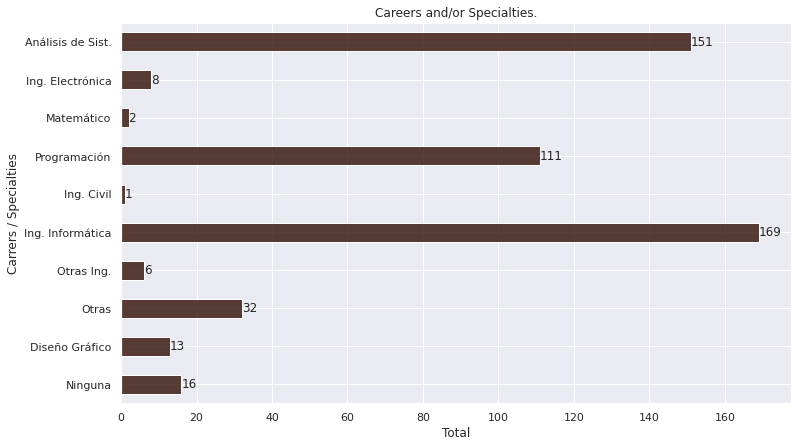

In [10]:
# Making a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Declaring the plot.
carr_esp_df = make_df(df, "carr_especialidades", "categorias", "conteo")

print(carr_esp_df)
print("\n" * 4)


carr_esp_plot = carr_esp_df.plot(
    kind="barh",
    title="Careers and/or Specialties.",
    legend=False,
    color=get_color("fasdf", "light"),
)

carr_esp_uniques = get_column_uniques(df, "carr_especialidades")


carr_esp_plot.set_yticks([k for k, v in enumerate(carr_esp_uniques)], minor=False)
carr_esp_plot.set_yticklabels(
    [i for i in carr_esp_uniques],
    fontdict=None,
    minor=False,
)


carr_esp_plot.set_xlabel("Total")
carr_esp_plot.set_ylabel("Carrers / Specialties")


cat_values = [i for i in carr_esp_df.conteo.value_counts().keys()]


# Plot annotations.
for k, v in enumerate(cat_values):
    carr_esp_plot.annotate(v, (v, k), va="center")

    # nv_ed_plot.annotate(v, (v,k),va='center')

plt.show()

In [11]:
carr_esp_uniques = get_column_uniques(df, "carr_especialidades")

In [12]:
carr_esp_uniques
print(len(carr_esp_uniques))

10


## Importance of Formal Education
    - column name : 'imp_ed_formal'

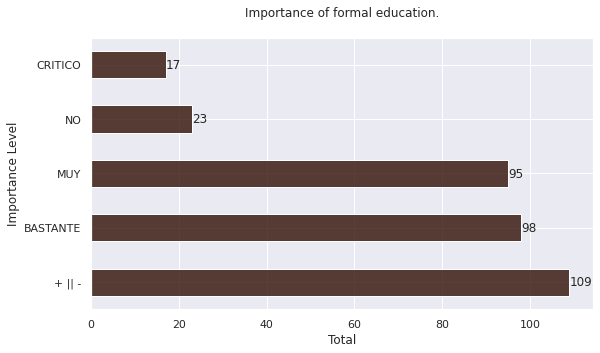

In [13]:
# Ploting a figure for this column.
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)
# Plot
exp_df = df["imp_ed_formal"].value_counts()
exp_plot = exp_df.plot(
    kind="barh",
    title=f"Importance of formal education.\n",
    color=get_color("Mafasdfadle", "light"),
)


exp_plot.set_xlabel("Total")
exp_plot.set_ylabel("Importance Level")


# Plot annotations.
for k, v in enumerate(df["imp_ed_formal"].value_counts().values):
    exp_plot.annotate(v, (v, k), va="center")
plt.show()

## Educational Level x Gender

    - We explore the "educational level" of the people who answered the survey by gender.

In [14]:
# Making groups by gender.
gen = df.groupby("genero")

In [15]:
# Print genders keys.
df["genero"].value_counts().keys()

Index(['HOMBRE', 'MUJER', 'NO COMPARTO'], dtype='object')

### Education Level - HOMBRE
    - Education level for the group of MENS. 

In [16]:
# Available Columns:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

In [17]:
# Print group 'HOMBRE' and the column 'educacion' with its value counts.
gen.get_group("HOMBRE")["educacion"].value_counts()

University Education                                                              117
Basic Education;Middle School;University Education                                 37
Basic Education;Middle School;University Education;Autodidact                      31
University Education;Autodidact                                                    23
Master                                                                             15
Middle School                                                                      10
Basic Education;Middle School                                                       9
Basic Education;Middle School;Autodidact                                            8
Middle School;Autodidact                                                            7
University Education;Master                                                         6
Basic Education;Middle School;University Education;Master                           4
Basic Education;Middle School;University Education;Mas

In [18]:
ed_uniques = get_column_uniques(df, "educacion")

             categories  count
0       Basic Education     93
1  University Education    226
2            Autodidact     78
3             Doctorate      2
4                Master     32
5         Middle School    113


<Figure size 648x360 with 0 Axes>

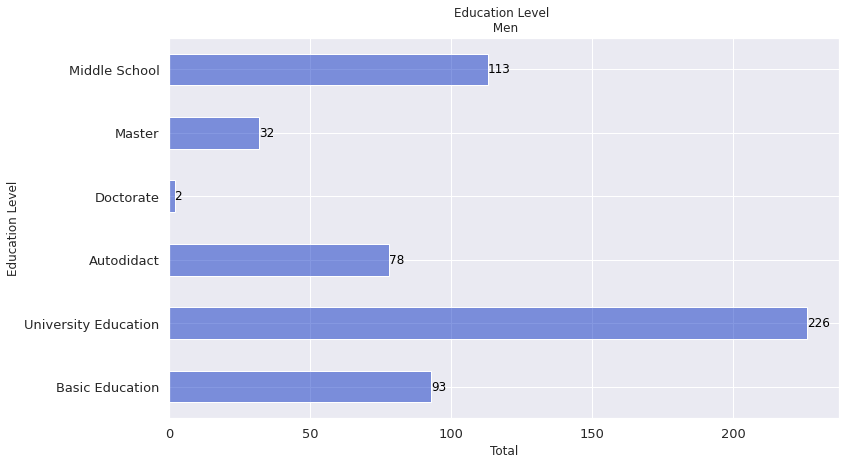

In [19]:
# Making a plot for this 'relation'.
fig = plt.figure(figsize=(9, 5))
# Plot
ed_hombres_df = make_df(gen.get_group("HOMBRE"), "educacion", "categories", "count")
ed_hombres_plot = ed_hombres_df.plot(
    kind="barh",
    title="Education Level \n Men",
    fontsize=13,
    legend=False,
    color=get_color("Male", "light"),
)

print(ed_hombres_df)
ed_hombres_plot.set_yticklabels([v for k, v in enumerate(ed_uniques)])


ed_hombres_plot.set_xlabel("Total")
ed_hombres_plot.set_ylabel("Education Level")


# Plot annotations.
for k, v in enumerate(ed_hombres_df["count"]):
    if v < 10:
        # if count its less than 10, value will be painted in 'red'.
        ed_hombres_plot.annotate(v, (v, k), va="center", color="black")
    else:
        # if count its greather than 10, value will be painted in 'blue'.
        ed_hombres_plot.annotate(v, (v, k), va="center", color="black")
plt.show()

### Careers or Specialties - HOMBRE

    - Column name : 'carr_especialidades'

In [20]:
# Print 'value counts' of this column.
gen.get_group("HOMBRE")["carr_especialidades"].value_counts()

Ing. Informática                                                        92
Análisis de Sist.                                                       52
Programación;Análisis de Sist.                                          22
Programación;Ing. Informática                                           17
Programación;Análisis de Sist.;Ing. Informática                         15
Programación                                                            15
Ninguna                                                                 13
Análisis de Sist.;Ing. Informática                                       7
Ing. Electrónica                                                         5
Programación;Análisis de Sist.;Otras                                     5
Ing. Informática;Otras                                                   4
Otras Ing.                                                               4
Análisis de Sist.;Otras                                                  3
Otras                    

            Category  count
0            Ninguna     14
1     Diseño Gráfico     11
2              Otras     29
3         Otras Ing.      5
4   Ing. Informática    143
5       Programación     90
6         Matemático      2
7   Ing. Electrónica      7
8  Análisis de Sist.    115


<Figure size 648x360 with 0 Axes>

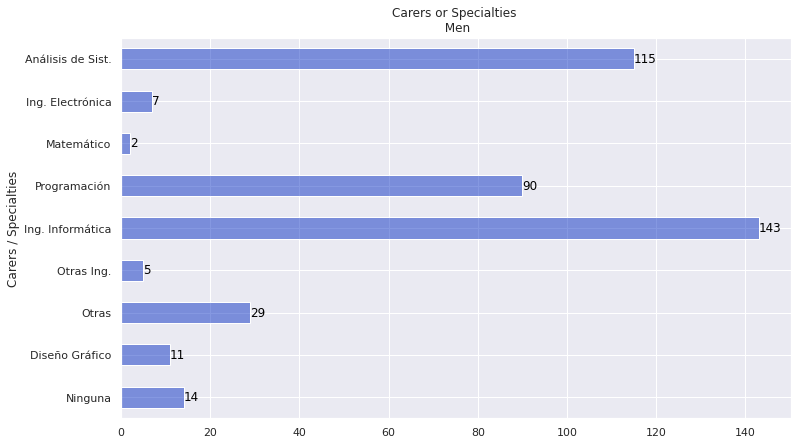

In [21]:
# Making a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Plot
carr_hombres_df = make_df(
    gen.get_group("HOMBRE"), "carr_especialidades", "Category", "count"
)
carr_hombres_plot = carr_hombres_df.plot(
    kind="barh",
    title="Carers or Specialties \n Men",
    xlabel="Carers / Specialties",
    legend=False,
    color=get_color("Male", "light"),
)

print(carr_hombres_df)
carr_hombres_plot.set_yticklabels(
    [v for k, v in enumerate(carr_hombres_df["Category"])]
)


# Plot annotations.
for k, v in enumerate(carr_hombres_df["count"]):
    if v < 10:
        # If count its less than 10, value will be painted in 'red'.
        carr_hombres_plot.annotate(v, (v, k), va="center", color="black")
    else:
        # If count its greather than 10, value will be painted in 'blue'.
        carr_hombres_plot.annotate(v, (v, k), va="center", color="black")
plt.show()

 - NOTE: There is a theoretical or scope conflict within the content of this column. A career is an academic degree and a specialty is a branch of knowledge within a career. Within the column the category "programacion, ninguna, Otras" are presented. It makes no sense to consider them.

### Importance of formal education. - HOMBRES

In [22]:
# Print the 'normal count' of values in the column.
df["imp_ed_formal"].value_counts()

+ || -      109
BASTANTE     98
MUY          95
NO           23
CRITICO      17
Name: imp_ed_formal, dtype: int64

In [23]:
# Any null value?
df["imp_ed_formal"].isna().sum()

0

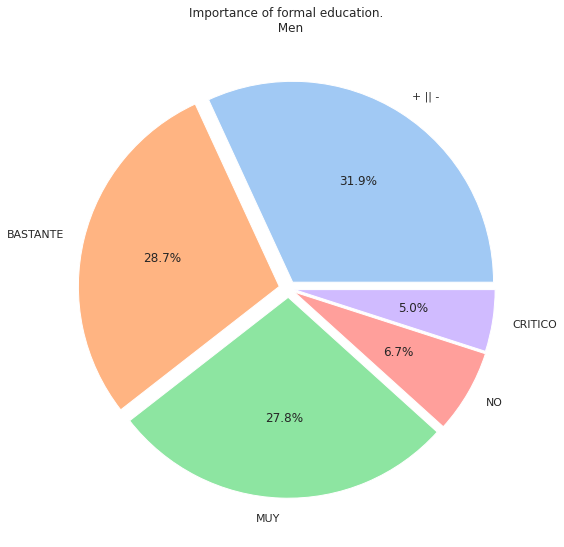

In [24]:
# Making a chart for this column.
fig = plt.figure(figsize=(9, 30))
ax1 = plt.subplot(111)
# Plot
import_df = df["imp_ed_formal"].value_counts(normalize=True)
import_plot = import_df.plot(
    kind="pie",
    title="Importance of formal education. \n Men",
    autopct="%1.1f%%",
    ylabel="",
    xlabel="",
    explode=explode_pie(import_df.size),
)


plt.show()

### EDUCACION - MUJERES

In [25]:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

 - Grouped in this way, the content of the column makes no sense. We will try to separate each "category".

In [26]:
gen.get_group("MUJER")["educacion"].value_counts()

University Education                                             29
University Education;Autodidact                                   5
Basic Education;Middle School;University Education                5
Basic Education;Middle School;University Education;Autodidact     3
University Education;Master                                       2
Master                                                            2
Master;Autodidact                                                 1
Basic Education;Middle School                                     1
Middle School                                                     1
Name: educacion, dtype: int64

             categories  count
0       Basic Education      9
1  University Education     44
2            Autodidact      9
3                Master      5
4         Middle School     10


<Figure size 648x360 with 0 Axes>

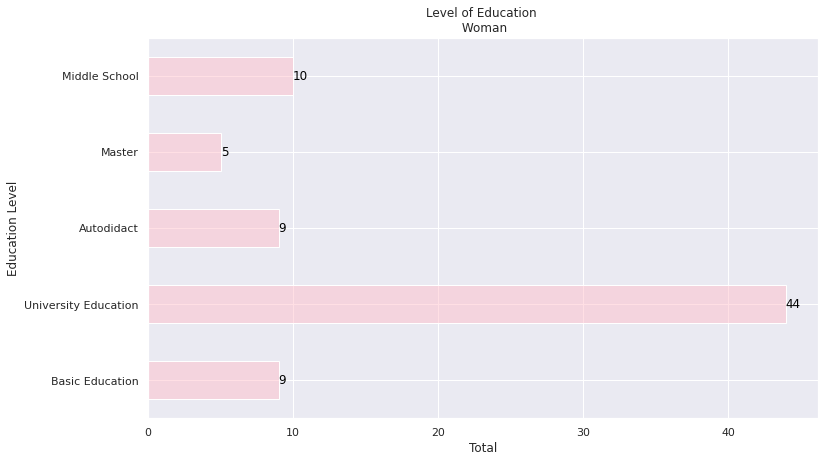

In [27]:
fig = plt.figure(figsize=(9, 5))


ed_mujeres_df = make_df(gen.get_group("MUJER"), "educacion", "categories", "count")
ed_mujeres_plot = ed_mujeres_df.plot(
    kind="barh",
    title="Level of Education \n Woman",
    legend=False,
    color=get_color("Female", "light"),
)

print(ed_mujeres_df)
ed_mujeres_plot.set_yticklabels([v for k, v in enumerate(ed_mujeres_df["categories"])])

ed_mujeres_plot.set_xlabel("Total")
ed_mujeres_plot.set_ylabel("Education Level")


for k, v in enumerate([i for i in ed_mujeres_df["count"]]):
    if v < 10:
        ed_mujeres_plot.annotate(v, (v, k), va="center", color="black")
    else:
        ed_mujeres_plot.annotate(v, (v, k), va="center", color="black")

plt.show()

### Carreras o especialidades. - MUJERES
 - column name : 'carr_especialidades'

          categories  count
0     Diseño Gráfico      1
1              Otras      2
2   Ing. Informática     22
3       Programación     15
4  Análisis de Sist.     27


<Figure size 648x360 with 0 Axes>

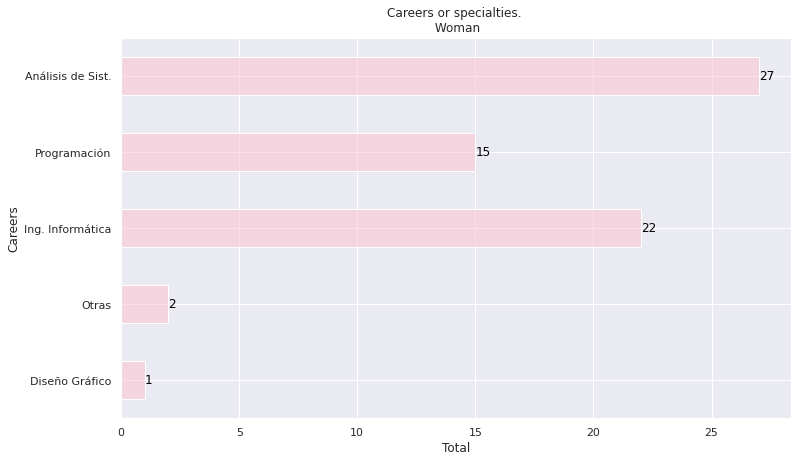

In [28]:
fig = plt.figure(figsize=(9, 5))


carr_mujeres_df = make_df(
    gen.get_group("MUJER"), "carr_especialidades", "categories", "count"
)
carr_mujeres_plot = carr_mujeres_df.plot(
    kind="barh",
    ylabel="Carers / Specialties",
    title="Careers or specialties. \n Woman",
    legend=False,
    color=get_color("Female", "light"),
)


carr_mujeres_plot.set_xlabel("Total")
carr_mujeres_plot.set_ylabel("Careers")




print(carr_mujeres_df)
carr_mujeres_plot.set_yticklabels(
    [v for k, v in enumerate(carr_mujeres_df["categories"])]
)

for k, v in enumerate([i for i in carr_mujeres_df["count"]]):
    carr_mujeres_plot.annotate(v, (v, k), va="center", color="black")

plt.show()

# Importancia de la educacion formal. - MUJERES

 - column name : 'imp_ed_formal'

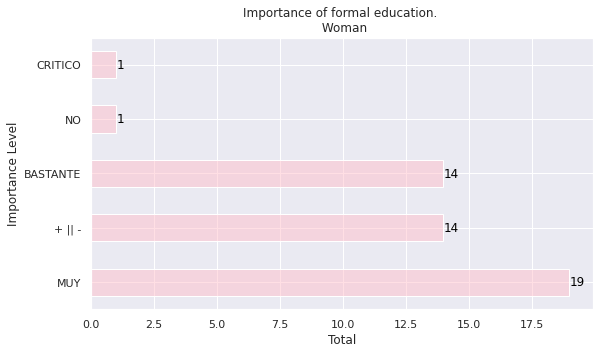

In [29]:
fig = plt.figure(figsize=(9, 5))

muj_import_df = gen.get_group("MUJER")["imp_ed_formal"].value_counts()
muj_import_plot = muj_import_df.plot(
        kind="barh",
        title="Importance of formal education. \n Woman",
        color=get_color("Female", "light"),
    )

muj_import_plot.set_xlabel("Total")
muj_import_plot.set_ylabel("Importance Level")



for k, v in enumerate(gen.get_group("MUJER")["imp_ed_formal"].value_counts().values):
    muj_import_plot.annotate(v, (v, k), va="center", color="black")

plt.show()

### EDUCACION - NO COMPARTO

In [30]:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

             categories  count
0            Autodidact      2
1       Basic Education      2
2         Middle School      3
3  University Education      4


<Figure size 648x360 with 0 Axes>

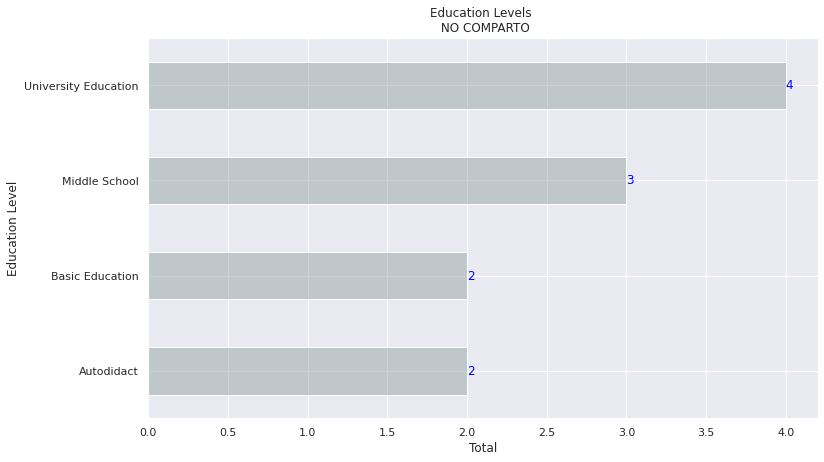

In [31]:
fig = plt.figure(figsize=(9, 5))
ed_no_comp_df = make_df(
    gen.get_group("NO COMPARTO"), "educacion", "categories", "count"
)

ed_no_comp_plot = ed_no_comp_df.plot(
    kind="barh",
    title="Education Levels \n NO COMPARTO",
    color=get_color("I do not share.", "light"),
    legend=False,
)


ed_no_comp_plot.set_xlabel("Total")
ed_no_comp_plot.set_ylabel("Education Level")

print(ed_no_comp_df)
ed_no_comp_plot.set_yticklabels([v for k, v in enumerate(ed_no_comp_df["categories"])])


for k, v in enumerate([i for i in ed_no_comp_df["count"]]):
    ed_no_comp_plot.annotate(v, (v, k), va="center", color="blue")

plt.show()

### Carreras o especialidades. - NO DEFINIDO

           categoria  cuenta
0            Ninguna       1
1     Diseño Gráfico       1
2         Otras Ing.       1
3   Ing. Informática       1
4         Ing. Civil       1
5       Programación       2
6   Ing. Electrónica       1
7  Análisis de Sist.       3


<Figure size 648x360 with 0 Axes>

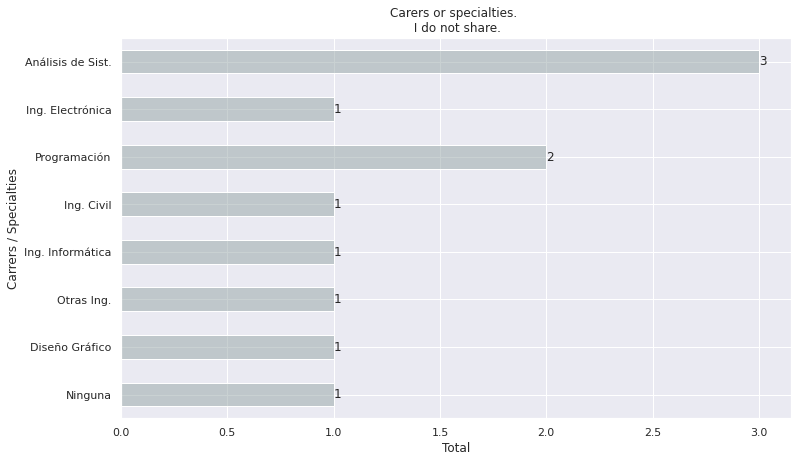

In [32]:
fig = plt.figure(figsize=(9, 5))


carr_no_comp_df = make_df(
    gen.get_group("NO COMPARTO"), "carr_especialidades", "categoria", "cuenta"
)
carr_no_comp_plot = carr_no_comp_df.plot(
    kind="barh",
    title="Carers or specialties. \n I do not share.",
    color=get_color("I do not share.", "light"),
    legend=False,
)


carr_no_comp_plot.set_xlabel("Total")
carr_no_comp_plot.set_ylabel("Carrers / Specialties")


print(carr_no_comp_df)
carr_no_comp_plot.set_yticklabels(
    [v for k, v in enumerate(carr_no_comp_df["categoria"])]
)


for k, v in enumerate([i for i in carr_no_comp_df["cuenta"]]):
    carr_no_comp_plot.annotate(v, (v, k), va="center")

plt.show()

### Importancia de la educacion formal. - NO DEFINIDO

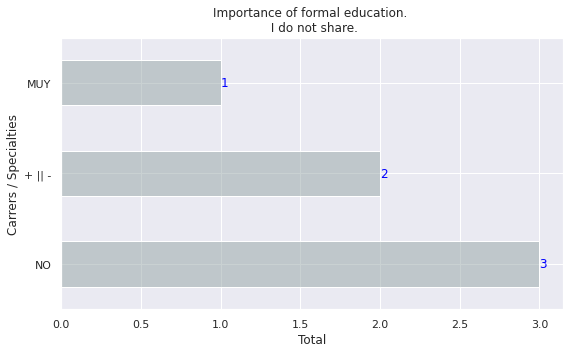

In [33]:
fig = plt.figure(figsize=(9, 5))
imp_ed_no_comp_df = gen.get_group("NO COMPARTO")["imp_ed_formal"].value_counts()
imp_ed_no_comp_plot = imp_ed_no_comp_df.plot(
    kind="barh",
    title="Importance of formal education. \n I do not share.",
    color=get_color("I do not share.", "light"),
)


imp_ed_no_comp_plot.set_xlabel("Total")
imp_ed_no_comp_plot.set_ylabel("Carrers / Specialties")


for k, v in enumerate(
    [i for i in gen.get_group("NO COMPARTO")["imp_ed_formal"].value_counts().values]
):
    imp_ed_no_comp_plot.annotate(v, (v, k), va="center", color="blue")

plt.show()

In [34]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

# IMPORTANCIA DE LA EDUCACION FORMAL - COMPARATIVAS

columna --------> 'imp_ed_formal'

In [35]:
generos = gen.groups.keys()

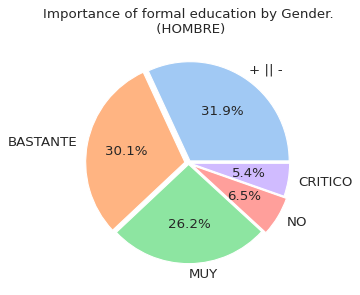

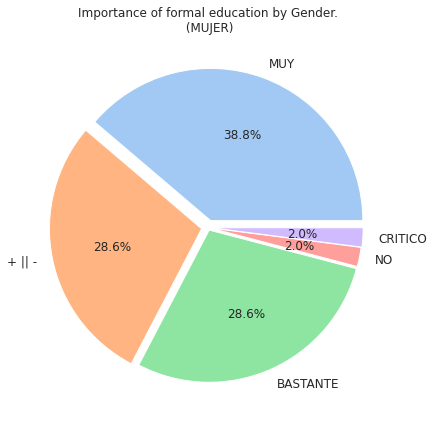

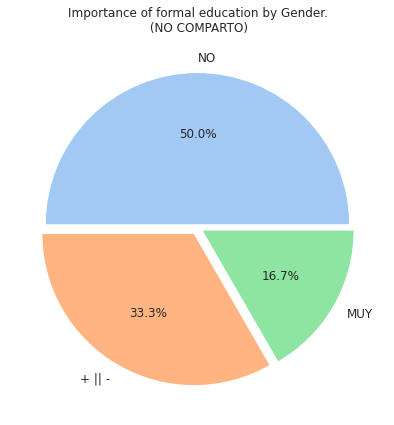

In [36]:
plt.figure(figsize=(4, 20), dpi=80)


for k, v in enumerate(generos):
    # plt.subplot(2, 2, k + 1)
    ie_df = gen.get_group(v)["imp_ed_formal"].value_counts(normalize=True)
    ie_plot = ie_df.plot(
        kind="pie",
        ylabel="",
        autopct="%1.1f%%",
        explode=explode_pie(ie_df.size),
        textprops={"fontsize": 12},
        title=f"Importance of formal education by Gender.\n ({v})",
    )
    plt.show()

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.3, wspace=0.4, hspace=0.4)

In [37]:
for k, v in enumerate(generos):
    ie_df = gen.get_group(v)["imp_ed_formal"].value_counts(normalize=True)
    print(f"Gender : {v}\nImportance of formal education.")
    print("=" * 33)
    print(percentage_to_normal(ie_df))
    print("\n" * 4)

Gender : HOMBRE
Importance of formal education.
+ || -      31.9 %
BASTANTE    30.1 %
MUY         26.2 %
NO           6.5 %
CRITICO      5.4 %
Name: imp_ed_formal, dtype: object





Gender : MUJER
Importance of formal education.
MUY         38.8 %
+ || -      28.6 %
BASTANTE    28.6 %
NO           2.0 %
CRITICO      2.0 %
Name: imp_ed_formal, dtype: object





Gender : NO COMPARTO
Importance of formal education.
NO        50.0 %
+ || -    33.3 %
MUY       16.7 %
Name: imp_ed_formal, dtype: object





